In [2]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import networkx as nx
import osmnx as ox
import geopandas as gpd
import networkx as nx

/usr/local/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  warnings.warn(


In [3]:
hospitals = pd.read_csv('/Users/muhammad-faaiz.shanawas/Documents/Live Projects/MCLP/data/cambridge_uni_hospital_sites.csv')
hospitals

,Code,Name,National Grouping,High Level Health Geography,Address Line 1,Address Line 2,Address Line 3,Address Line 4,Address Line 5,Postcode,Open Date,Close Date,Organisation Sub-Type Code,Parent Org Code
0,A6B3B,CUH AT MEADOWS COMMUNITY CENTRE,Y61,QUE,1 ST. CATHARINES ROAD,NaN,NaN,CAMBRIDGE,NaN,CB4 3XJ,20211001,NaN,NaN,RGT
1,A9J5N,CUH AT ROSMINI CENTRE,Y61,QUE,69A QUEENS ROAD,NaN,NaN,WISBECH,NaN,PE13 2PH,20220401,NaN,NaN,RGT
2,B1C9Z,CUH AT SPECSAVERS ROYSTON,Y61,QUE,27A-27B HIGH STREET,NaN,NaN,ROYSTON,NaN,SG8 9AA,20220401,NaN,NaN,RGT
3,B5D1I,CUH AT DODDINGTON HOSPITAL,Y61,QUE,BENWICK ROAD,DODDINGTON,NaN,MARCH,NaN,PE15 0UG,20210401,NaN,NaN,RGT
4,C5Z7J,CAMBRIDGE BIOMEDICAL RESEARCH CENTRE - VALNEVA...,Y61,QUE,HILLS ROAD,NaN,NaN,CAMBRIDGE,NaN,CB2 0QQ,20210401,NaN,NaN,RGT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,RGT98,NUFFIELD HEALTH CAMBRIDGE HOSPITAL,Y61,QUE,4 TRUMPINGTON ROAD,NaN,NaN,CAMBRIDGE,CAMBRIDGESHIRE,CB2 8AF,20121001,NaN,NaN,RGT
174,RGT99,ST MARY'S SURGERY,Y61,QUE,37 ST. MARYS STREET,NaN,NaN,ELY,CAMBRIDGESHIRE,CB7 4HF,20121001,NaN,NaN,RGT
175,T4O3M,CUH AT COLCHESTER STARS,Y61,QUE,5A QUEEN STREET,NaN,NaN,COLCHESTER,NaN,CO1 2PG,20210401,NaN,NaN,RGT
176,T8C3T,CUH AT ROYAL PAPWORTH HOSPITAL,Y61,QUE,PAPWORTH ROAD,CAMBRIDGE BIOMEDICAL CAMPUS,NaN,CAMBRIDGE,NaN,CB2 0AY,20201001,NaN,NaN,RGT


In [4]:
!pip3 install pyrosm
from pyrosm import OSM, get_data
import osmnx as ox


# Get all walkable roads and the nodes 

osmCambridge = OSM(get_data("Cambridge"))
nodes, edges = osmCambridge.get_network(nodes=True)

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


In [5]:
G = osmCambridge.to_graph(nodes, edges, graph_type="networkx")

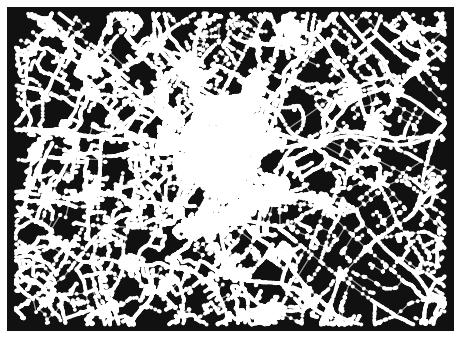

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [6]:
ox.plot_graph(G)

In [12]:
source_address1 = hospitals['Address Line 1'][0] + ', Cambridge'
source_address2 = hospitals['Address Line 1'][4] + ', Cambridge'
source_address3 = hospitals['Address Line 1'][173] + ', Cambridge'
source_address4 = hospitals['Address Line 1'][177] + ', Cambridge'
target_address = hospitals['Address Line 1'][176] + ', Cambridge'
target_address


'PAPWORTH ROAD, Cambridge'

In [13]:
source1 = ox.geocode(source_address1)
source2 = ox.geocode(source_address2)
source3 = ox.geocode(source_address3)
source4 = ox.geocode(source_address4)
target = ox.geocode(target_address)

In [14]:
source_node1 = ox.get_nearest_node(G, source1)
source_node2 = ox.get_nearest_node(G, source2)
source_node3 = ox.get_nearest_node(G, source3)
source_node4 = ox.get_nearest_node(G, source4)

target_node = ox.get_nearest_node(G, target)

/usr/local/lib/python3.9/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/usr/local/lib/python3.9/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/usr/local/lib/python3.9/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/usr/local/lib/python3.9/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/usr/local/lib/p

In [15]:
route1 = nx.shortest_path(G, source_node1, target_node, weight="length")
route2 = nx.shortest_path(G, source_node2, target_node, weight="length")
route3 = nx.shortest_path(G, source_node3, target_node, weight="length")
route4 = nx.shortest_path(G, source_node4, target_node, weight="length")

In [18]:
routes = [route1, route2, route3, route4]
#rc = ['r','y','c','g']
rc1 = ['r'] * (len(route1) - 1)
rc2 = ['b'] * len(route2)
rc3 = ['y'] * len(route3)
rc4 = ['g'] * len(route4)
rc = rc1 + rc2 + rc3 +rc4

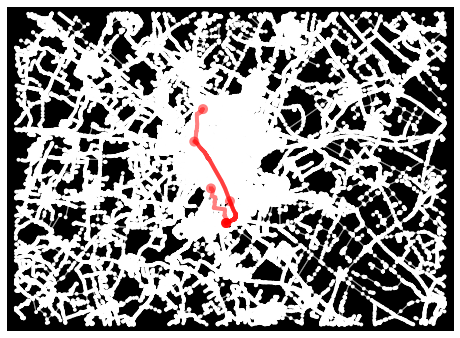

In [19]:
fig, ax = ox.plot_graph_routes(G, routes, route_color=rc, route_linewidth=6, bgcolor='k')

In [20]:
length1 = nx.shortest_path_length(G, source=source_node1, target=target_node, weight='length')
length2 = nx.shortest_path_length(G, source=source_node2, target=target_node, weight='length')
length3 = nx.shortest_path_length(G, source=source_node3, target=target_node, weight='length')
length4 = nx.shortest_path_length(G, source=source_node4, target=target_node, weight='length')

In [21]:
print(length1)
print(length2)
print(length3)
print(length4)

7910.671000000004
1733.3380000000002
2980.6189999999997
5816.598000000001


In [22]:
list_of_lengths = [length1, length2, length3, length4]

In [26]:
def create_score(list_of_lengths):
    score = 1000
    for l in list_of_lengths:
        deduction = (((l/1000)/4.5)*60) * 5 #get the length in km divide by speed 4.5 km/h then divide by 60 to get time in minutes
        score = score - deduction
        return score

In [27]:
target_score = create_score(list_of_lengths)
print('the score for the target site is {}'.format(target_score))

the score for the target site is 472.621933333333
